In [1]:
import pymaid
import navis as nv
import matplotlib.pyplot as plt
import time
from navis.interfaces import neuprint as nvneu
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=22)
from neuroboom import dendrogram as nbd
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import neuroboom as nb
import seaborn as sns

In [2]:
#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"<token>")


INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [3]:
#get ya neurons
MD1OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron'], allow_partial = False, intersect = True)
MD1osns=pymaid.get_neuron(MD1OSNs)

Fetch neurons:   0%|          | 0/45 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/45 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/579 [00:00<?, ?it/s]

INFO  : Data for 579 of 579 unique connector IDs retrieved (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 5s
neuron 803


<Figure size 640x480 with 0 Axes>

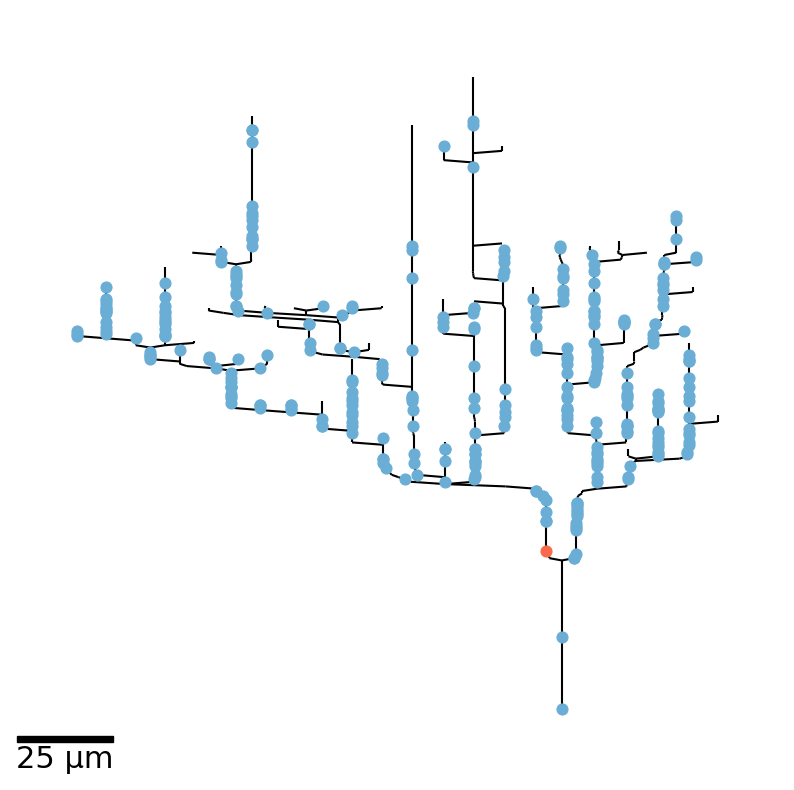

In [4]:
#get recurrent OSNs
neuron=802
n=pymaid.get_neuron(neuron)

#For recurrent connections, get connector IDs
con_details = pymaid.get_connector_details(n)
con_details_sub=con_details.explode("postsynaptic_to")
con_details_recurrent=con_details_sub[con_details_sub["postsynaptic_to"].isin(MD1OSNs)]

recurrent_color=sns.color_palette('Blues', 1)*46
recurrent_id_to_color= dict(zip(MD1OSNs, recurrent_color))


#map to the neuron
recurrent_connector_id_to_neuron = dict(zip(con_details_recurrent.connector_id, con_details_recurrent.postsynaptic_to))
recurrent_connector_id_to_color = {i : recurrent_id_to_color[recurrent_connector_id_to_neuron[i]] for i in con_details_recurrent.connector_id}

#map the ribbons to neuron
ribbonconnectors=pymaid.get_connectors(n, tags='ribbon synapse', relation_type="presynaptic_to")
    
#weed out neurons with zero ribbon synapses
if len(ribbonconnectors)==0:
	print('this neuron has no ribbon synapses')

else:
    #get connector details
    ribbon_details=pymaid.get_connector_details(ribbonconnectors)

    #color dictionary
    color=sns.color_palette('Reds', 1)*4
    id_to_color= dict(zip(ribbon_details.presynaptic_to, color))
    connector_id_to_neuron = dict(zip(ribbon_details.connector_id, ribbon_details.presynaptic_to))
    connector_id_to_color = {i : id_to_color[connector_id_to_neuron[i]] for i in ribbon_details.connector_id}

    #new dictionary
    ribbontbardict={}

    for key in recurrent_connector_id_to_color:
        ribbontbardict[key]=recurrent_connector_id_to_color[key]

    for key in connector_id_to_color:
        ribbontbardict[key]=connector_id_to_color[key] 


    #plot the dendrogram
    plt.clf()
    fig, ax= plt.subplots(figsize = (10,10))
    nbd.plot_dendrogram(n, fragment='true', prog='dot', linewidth=1.5, highlight_connectors = ribbontbardict, highlight_connector_size=60)
    scalebar = AnchoredSizeBar(ax.transData, 300, '25 µm', 'lower left', pad=0.1, color='black', frameon=False, size_vertical=200, fontproperties=fontprops)
    ax.add_artist(scalebar)
    print(n.name)
    name=str(n.id)
    plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/axograms/axogram_recurrent_ribbon_%s.svg' % name, format="svg")
    plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/axograms/axogram_recurrent_ribbon_%s.png' % name, format="png")
    plt.show()

In [5]:
#new dictionary
ribbontbardict={}

for key in recurrent_connector_id_to_color:
    ribbontbardict[key]=recurrent_connector_id_to_color[key]

for key in connector_id_to_color:
    ribbontbardict[key]=connector_id_to_color[key]

In [6]:
len(ribbontbardict)

336

In [7]:
len(recurrent_connector_id_to_color)

335

In [8]:
len(connector_id_to_color)

1

In [9]:
recurrent_connector_id_to_color

{8825: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 12893: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 100161: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 166317: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 168500: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 168530: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 168590: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 169524: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 170180: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 170971: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 171155: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 171244: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 171394: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 171438: (0.41708573625528644, 0.6806305267204922, 0.83823144944252

In [10]:
#get connector IDs for ribbons
ribbonconnectors=pymaid.get_connectors(n, tags= "ribbon synapse", relation_type="presynaptic_to")
ribbonconnectors


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


,connector_id,x,y,z,confidence,creation_time,edition_time,tags,type,creator,editor
0,985005,334789.2,229764.42,161440.0,5,2022-12-02 09:33:30.165153,2022-12-02 09:33:30.165153,[ribbon synapse],unknown,jb534,jb534


In [11]:
ribbon_details=pymaid.get_connector_details(ribbonconnectors)
ribbon_details


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


,connector_id,presynaptic_to,postsynaptic_to,presynaptic_to_node,postsynaptic_to_node
0,985005,802,[545608],6693,[985006]


In [12]:
#color dictionary

color=sns.color_palette('Reds', 1)*4
#id_to_color = dict(zip( sns.color_palette('Reds', 1)))
id_to_color= dict(zip(ribbon_details.presynaptic_to, color))
id_to_color

{802: (0.9835755478662053, 0.4127950788158401, 0.28835063437139563)}

In [13]:
#map to the neuron
connector_id_to_neuron = dict(zip(ribbon_details.connector_id, ribbon_details.presynaptic_to))
connector_id_to_neuron

{985005: 802}

In [14]:
connector_id_to_color = {i : id_to_color[connector_id_to_neuron[i]] for i in ribbon_details.connector_id} 

Plotting Tree...
Plotting connectors...
Completed in 4s


<Figure size 640x480 with 0 Axes>

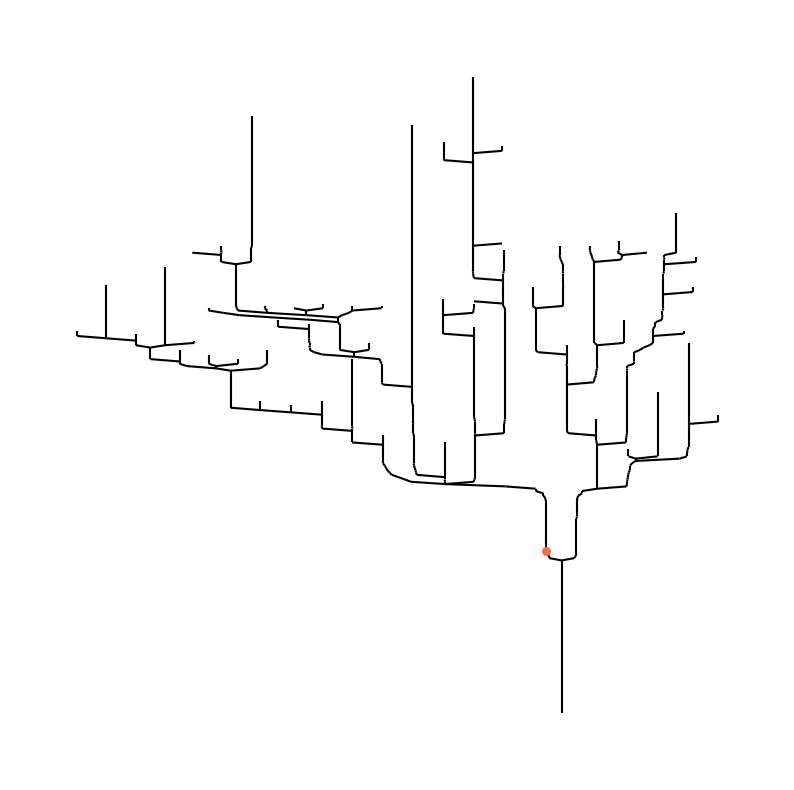

neuron 803


<Figure size 640x480 with 0 Axes>

In [15]:

#plot the dendrogram
plt.clf()
fig, ax= plt.subplots(figsize = (10,10))
nbd.plot_dendrogram(n, fragment='true', prog='dot', linewidth=1.5, highlight_connectors = connector_id_to_color, highlight_connector_size=30)
plt.show()
print(n.name)
name=str(n.id)
plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_ribbon_%s.svg' % name, format="svg")
plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_ribbon_%s.png' % name, format="png")

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/3 [00:00<?, ?it/s]

INFO  : Data for 3 of 3 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 3s
neuron 6789


<Figure size 640x480 with 0 Axes>

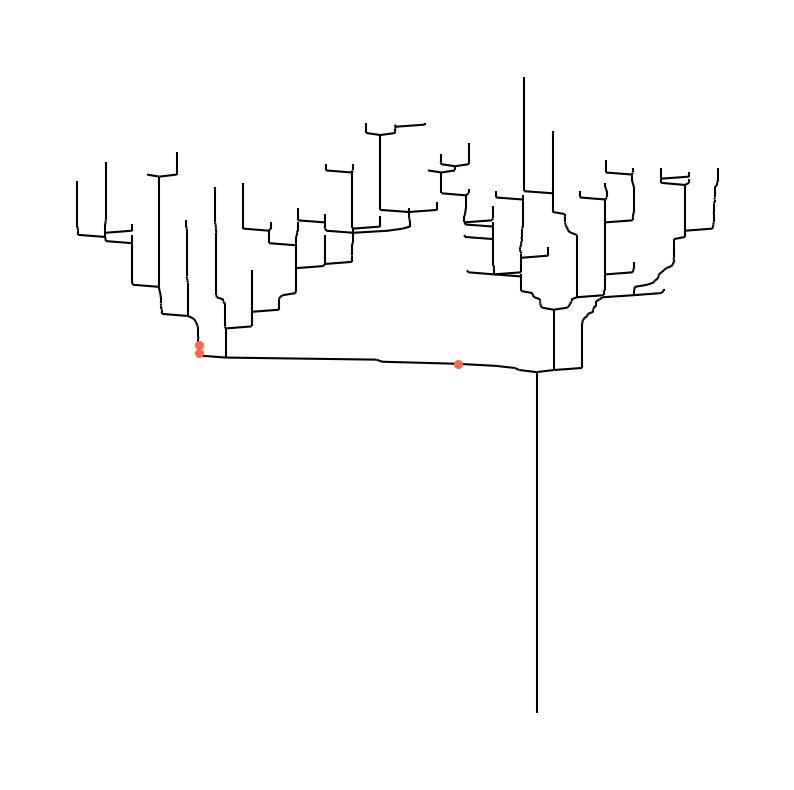

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 13s
neuron 7173


<Figure size 640x480 with 0 Axes>

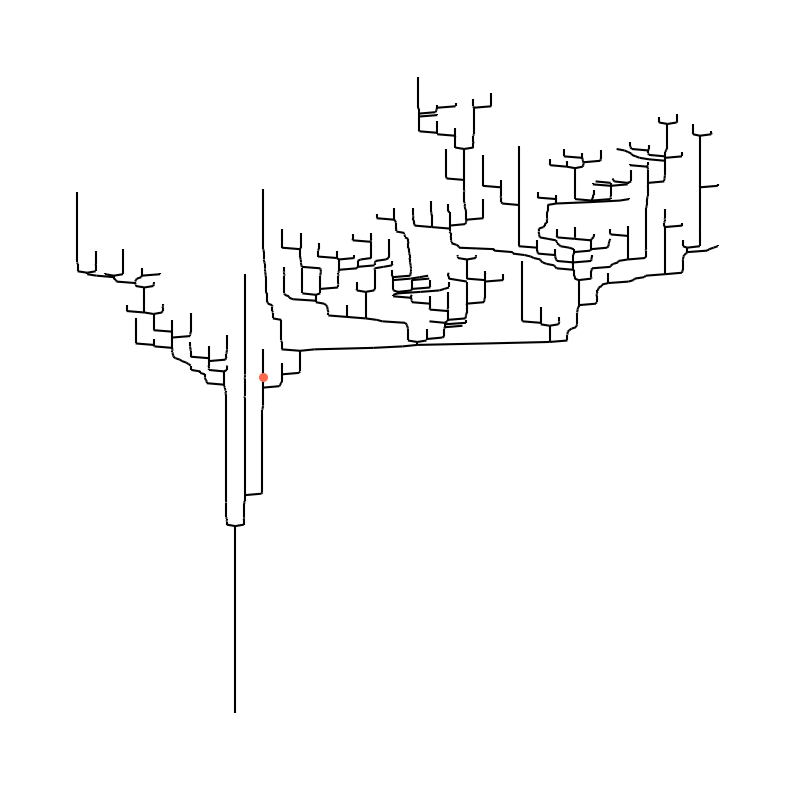

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 7s
neuron 7816


<Figure size 640x480 with 0 Axes>

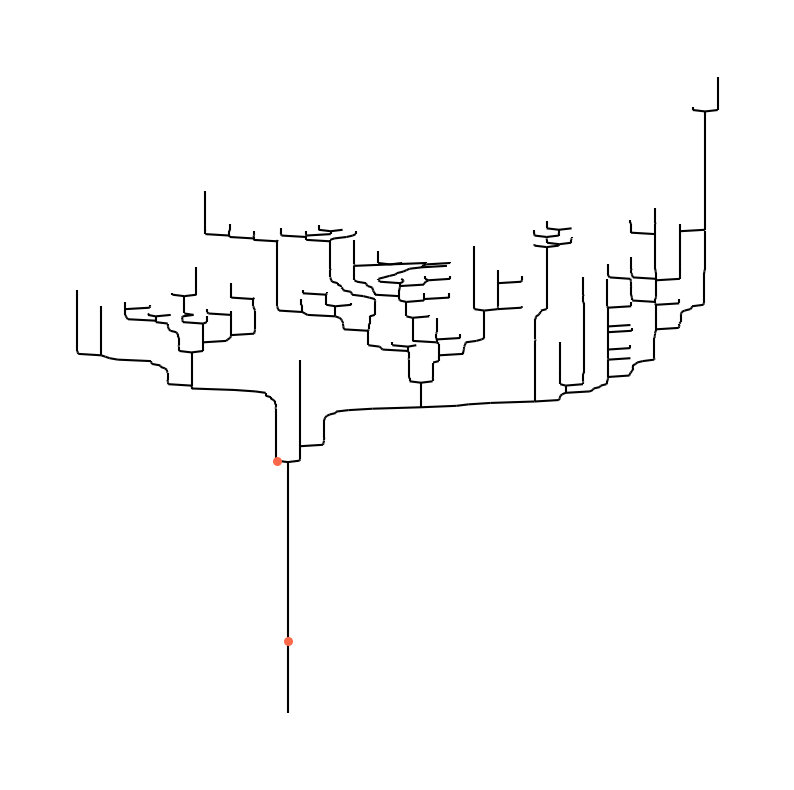

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 5s
neuron 7051


<Figure size 640x480 with 0 Axes>

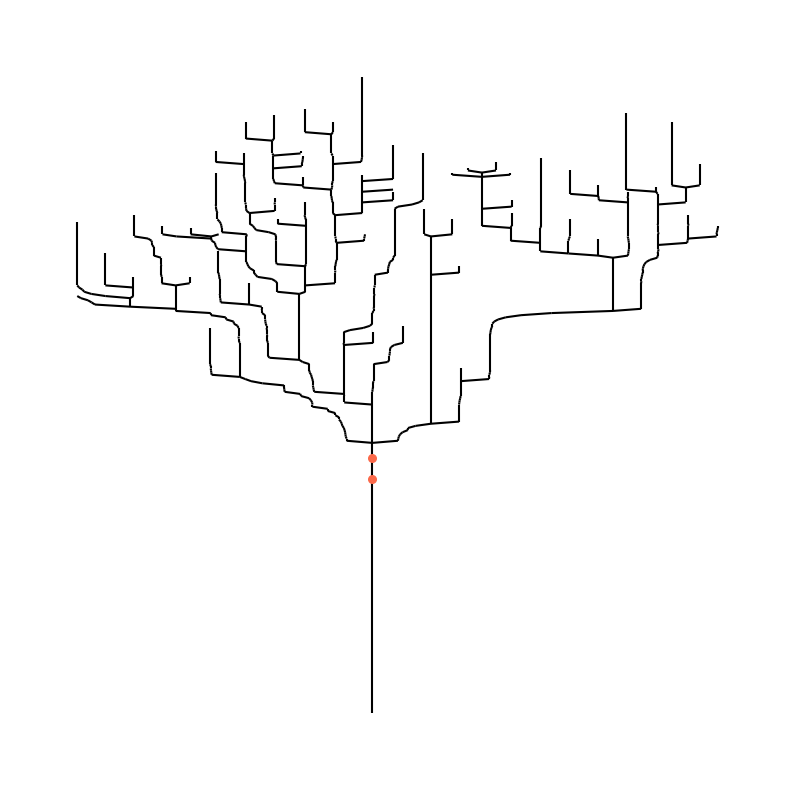

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 4s
neuron 1292


<Figure size 640x480 with 0 Axes>

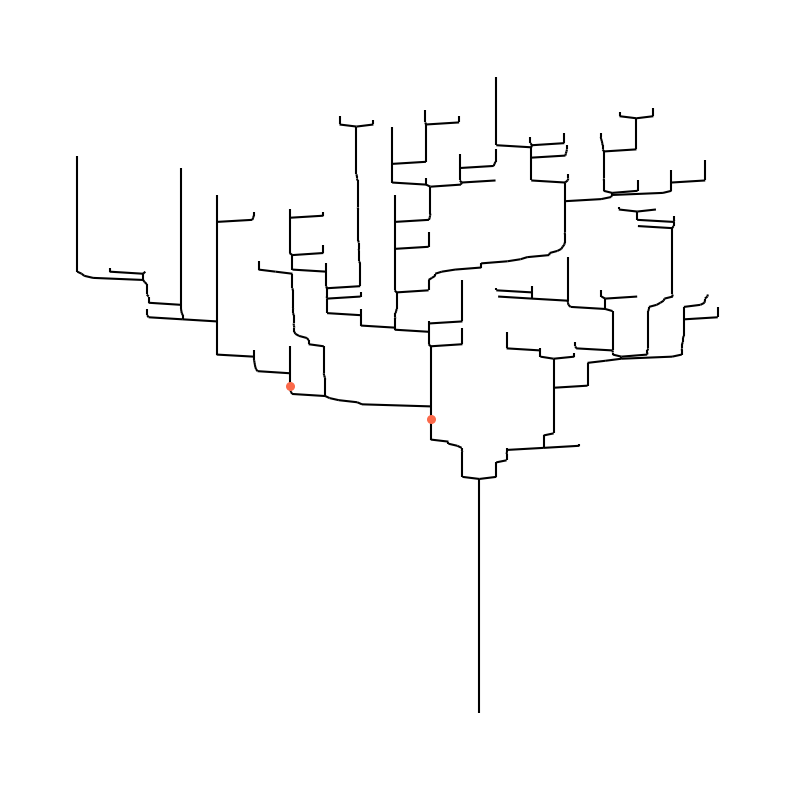

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 2s
neuron 8971


<Figure size 640x480 with 0 Axes>

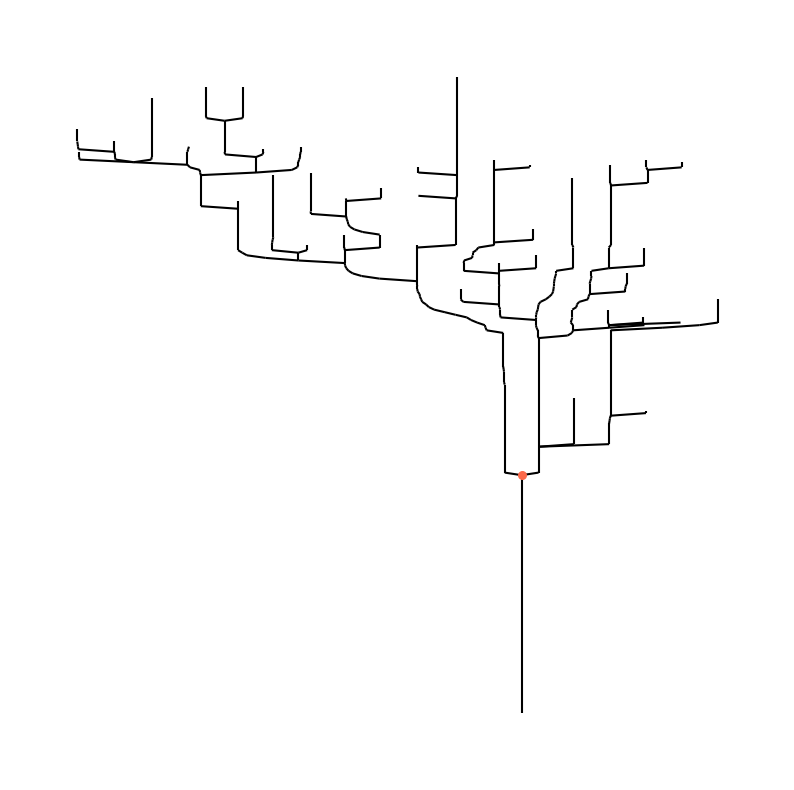

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 3s
Neuron 2717


<Figure size 640x480 with 0 Axes>

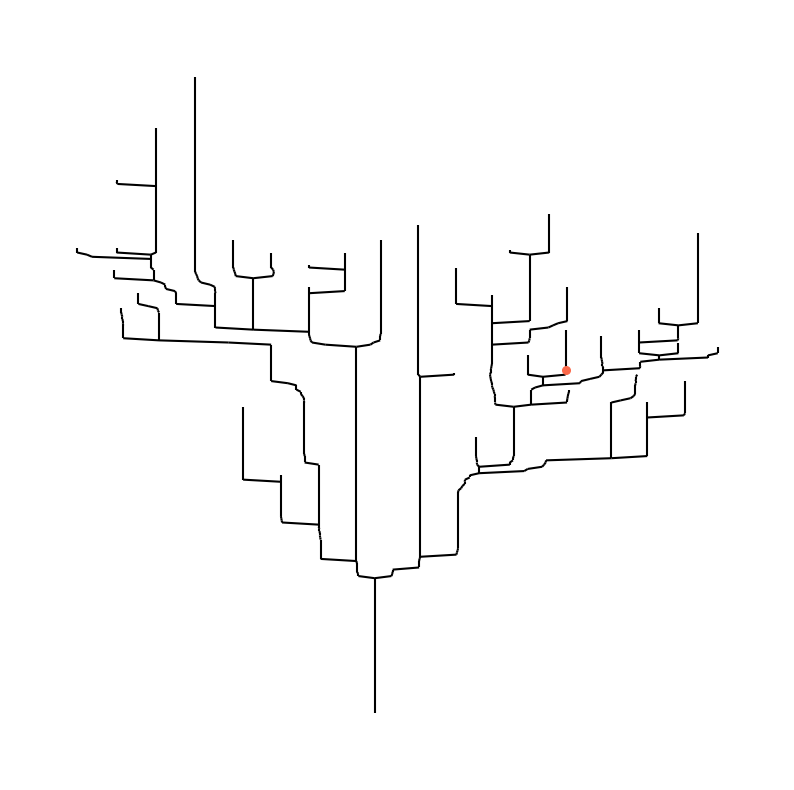

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 3s
neuron 798


<Figure size 640x480 with 0 Axes>

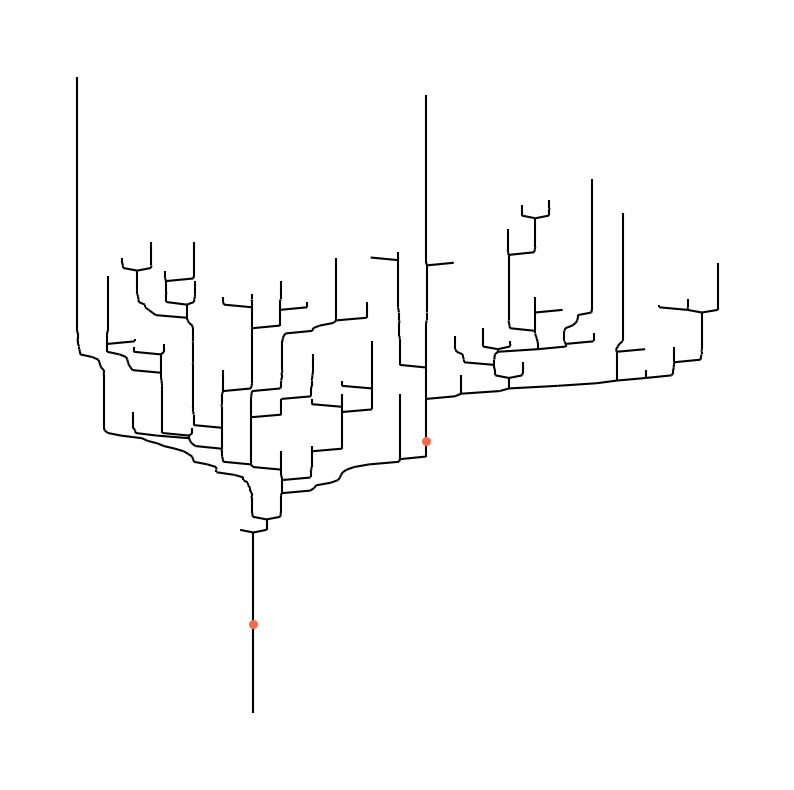

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 1s
neuron 5022


<Figure size 640x480 with 0 Axes>

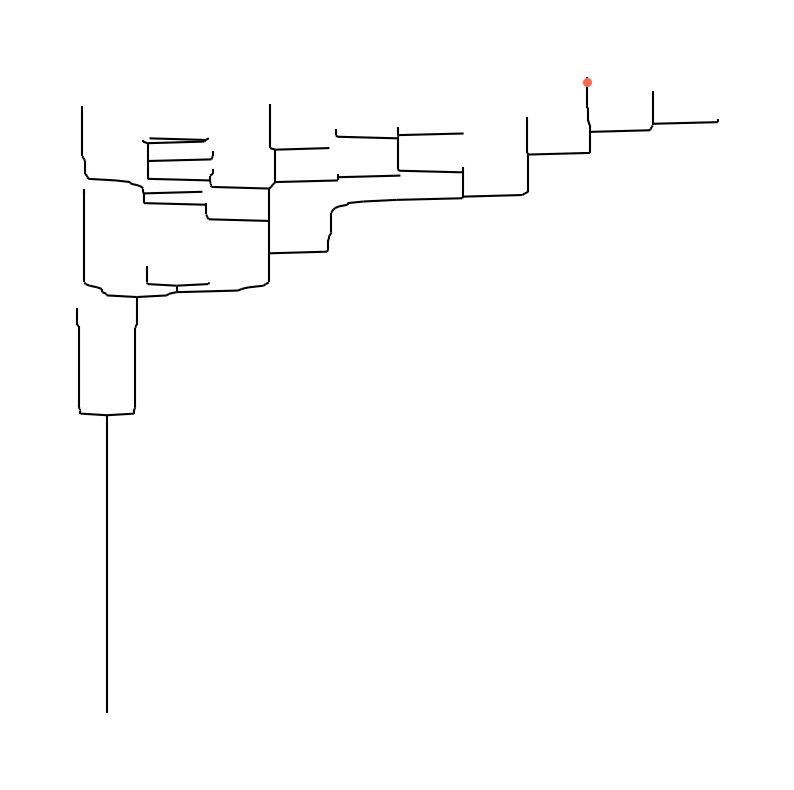

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/3 [00:00<?, ?it/s]

INFO  : Data for 3 of 3 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 11s
neuron 672


<Figure size 640x480 with 0 Axes>

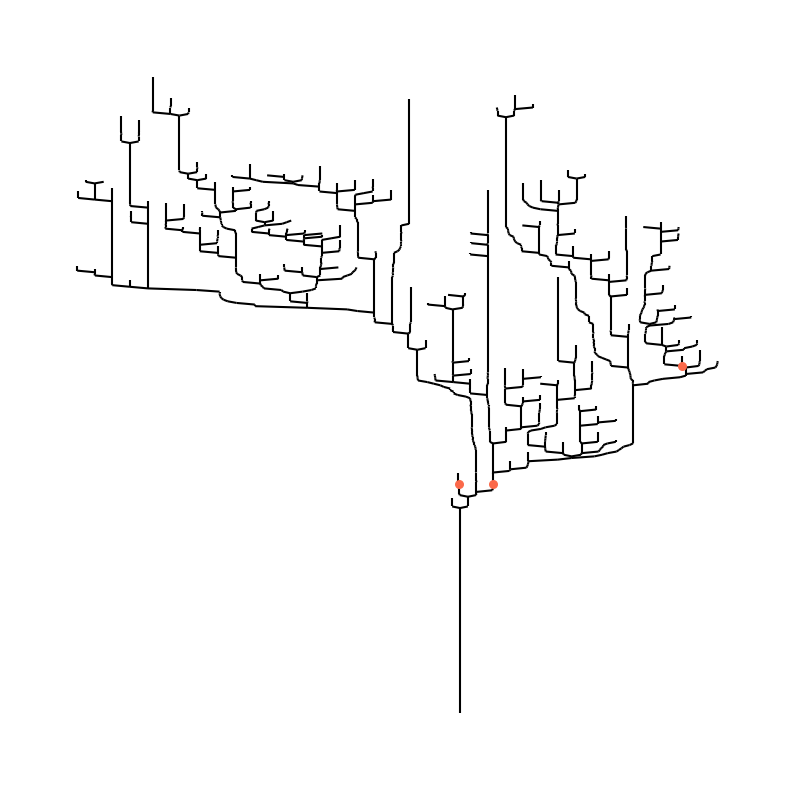

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 4s
neuron 803


<Figure size 640x480 with 0 Axes>

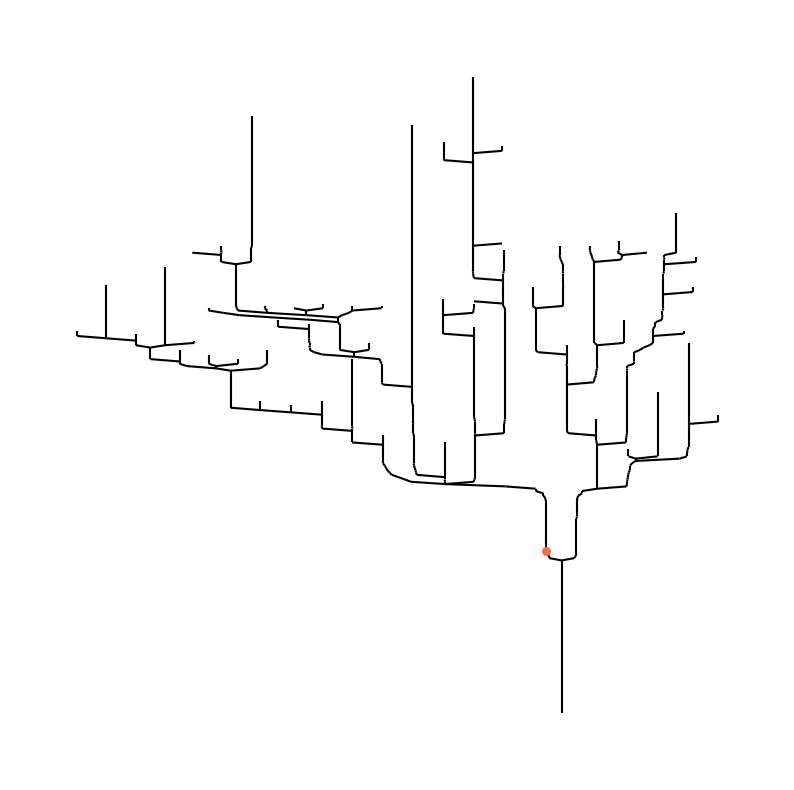

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


CN details:   0%|          | 0/3 [00:00<?, ?it/s]

INFO  : Data for 3 of 3 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 9s
neuron 954


<Figure size 640x480 with 0 Axes>

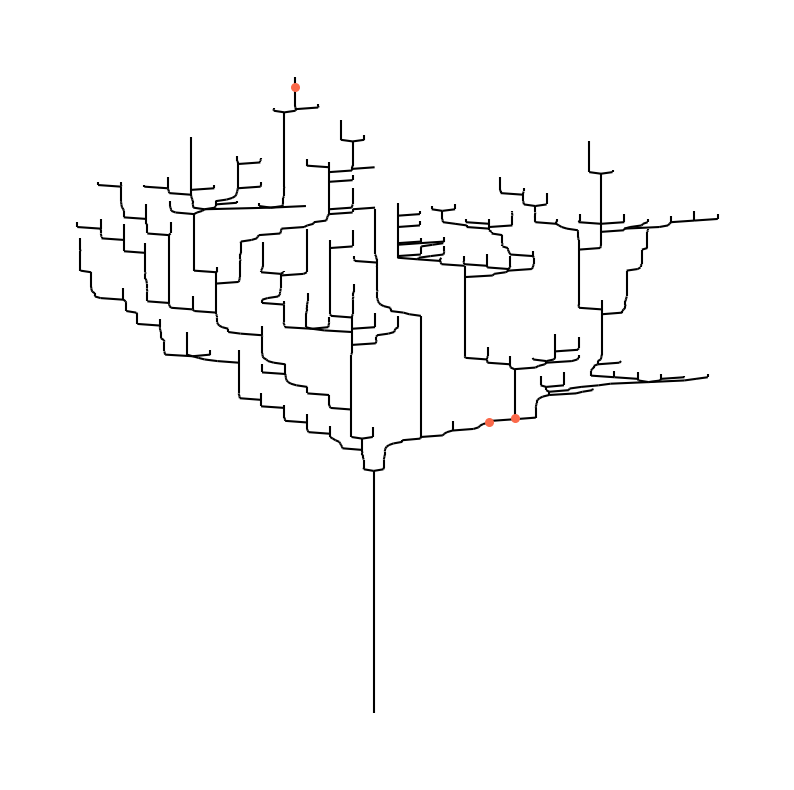

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 4s
neuron 6970


<Figure size 640x480 with 0 Axes>

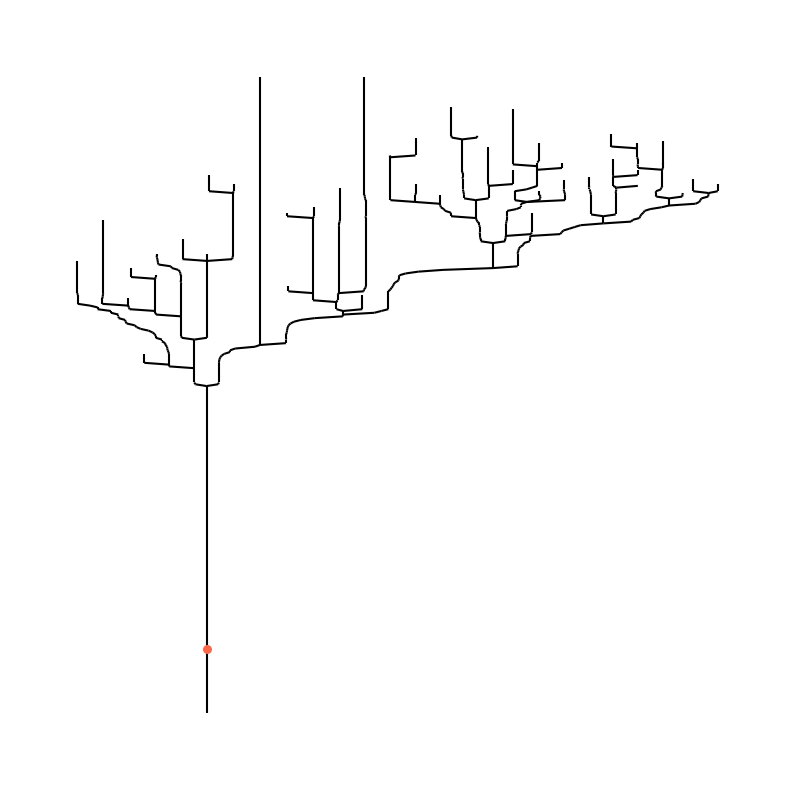

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 8s
neuron 216


<Figure size 640x480 with 0 Axes>

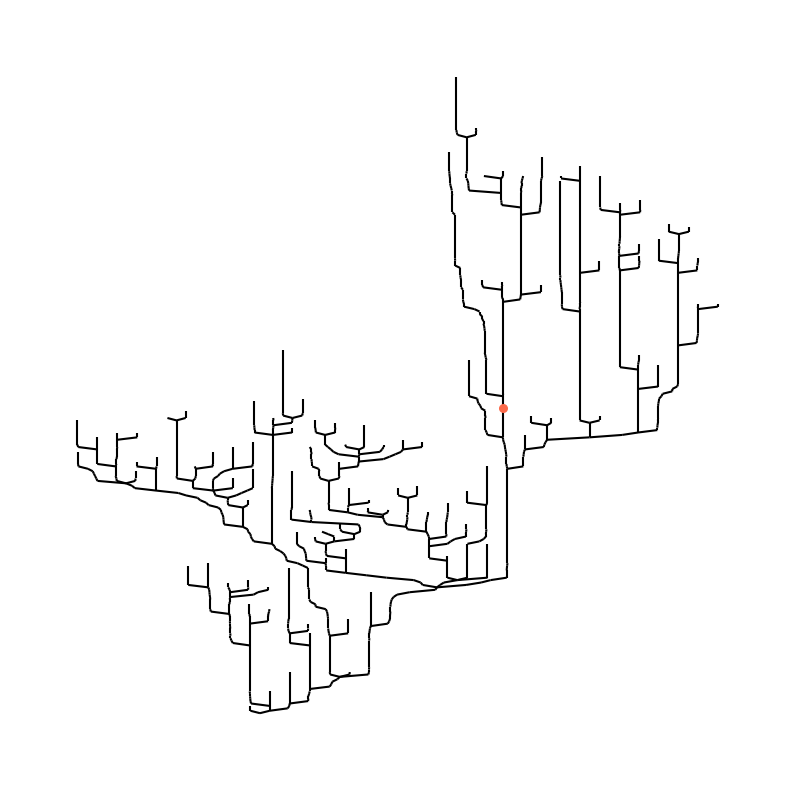

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses
this neuron has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 5s
neuron 6976


<Figure size 640x480 with 0 Axes>

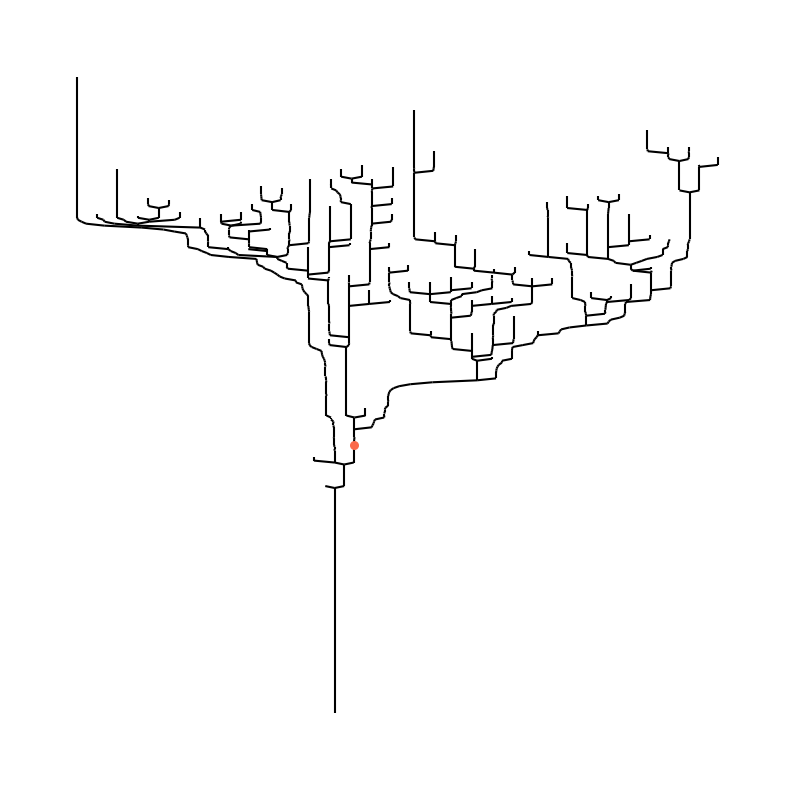

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses
this neuron has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 3s
neuron 9031


<Figure size 640x480 with 0 Axes>

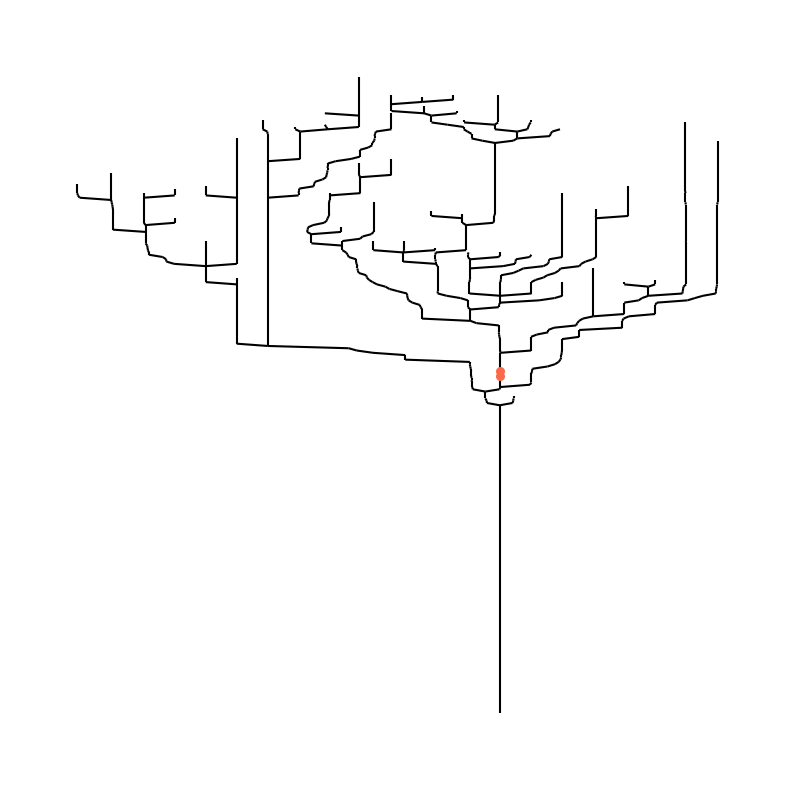

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 3s
Neuron 715


<Figure size 640x480 with 0 Axes>

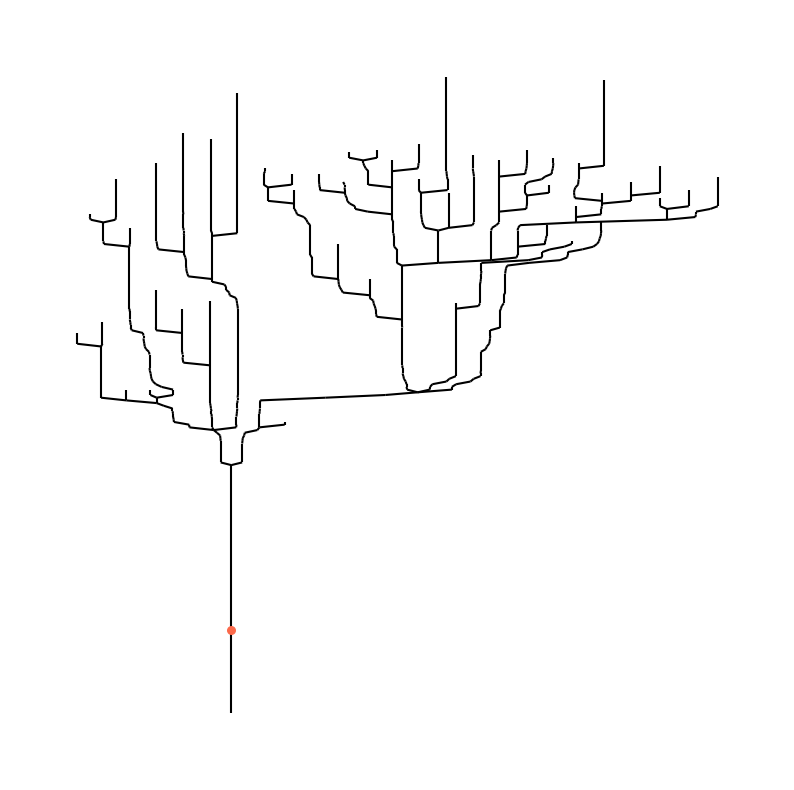

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 3s
neuron 9036


<Figure size 640x480 with 0 Axes>

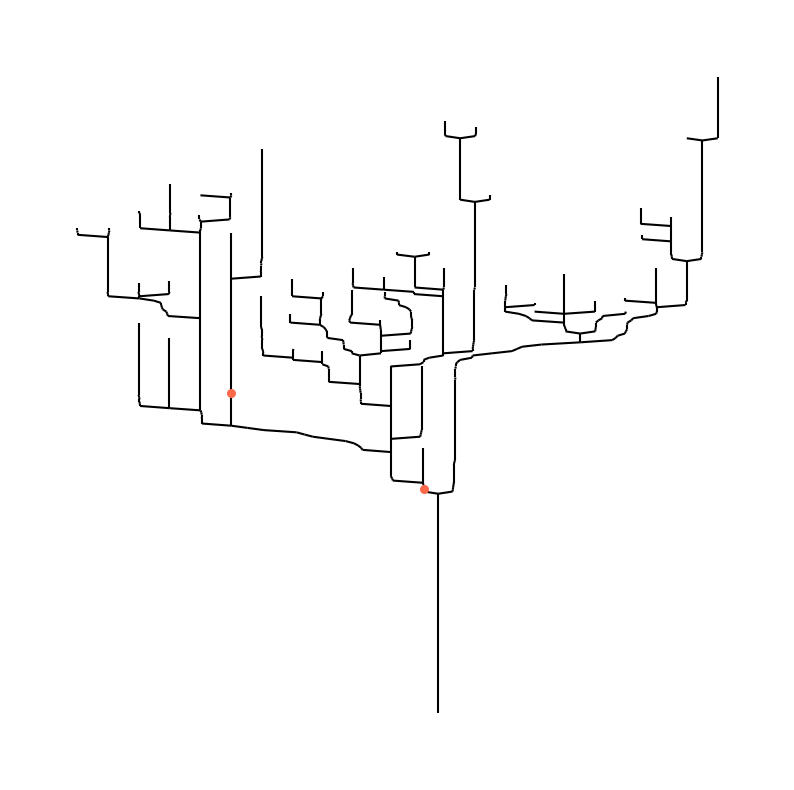

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 3s
neuron 3921


<Figure size 640x480 with 0 Axes>

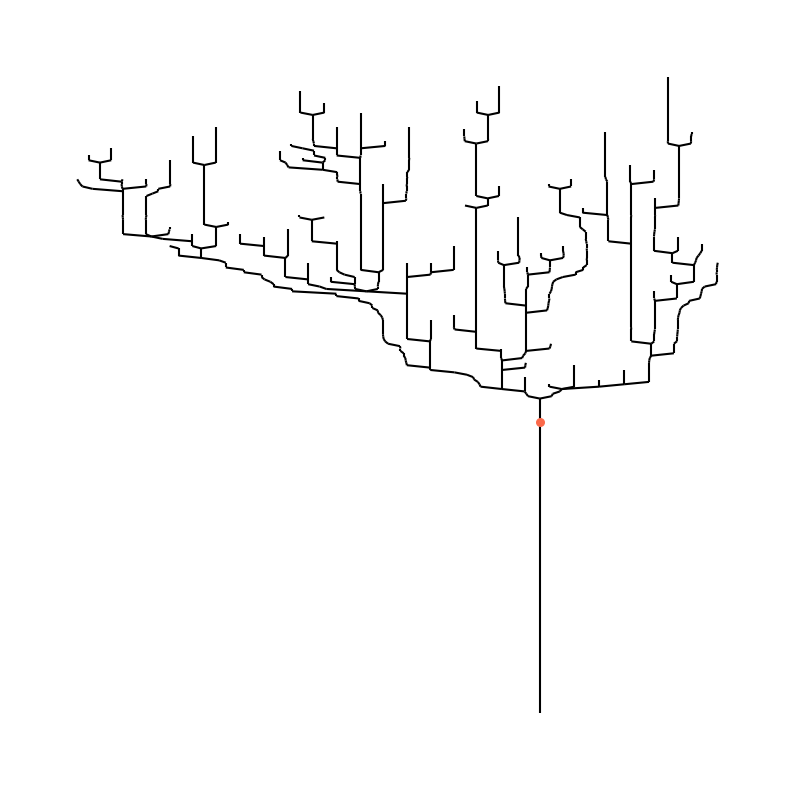

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 8s
neuron 6737


<Figure size 640x480 with 0 Axes>

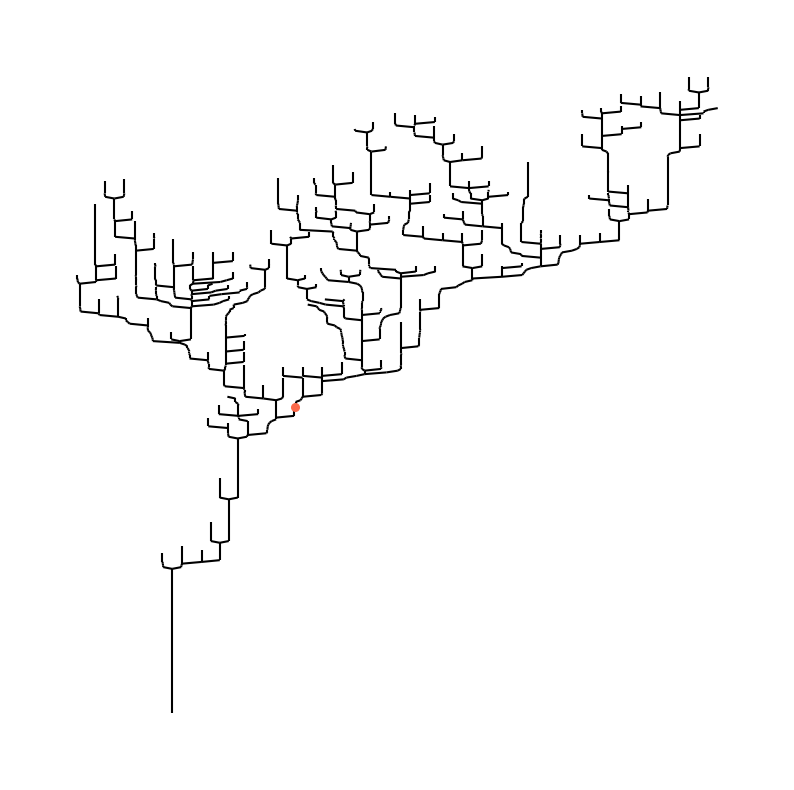

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 4s
neuron 7121


<Figure size 640x480 with 0 Axes>

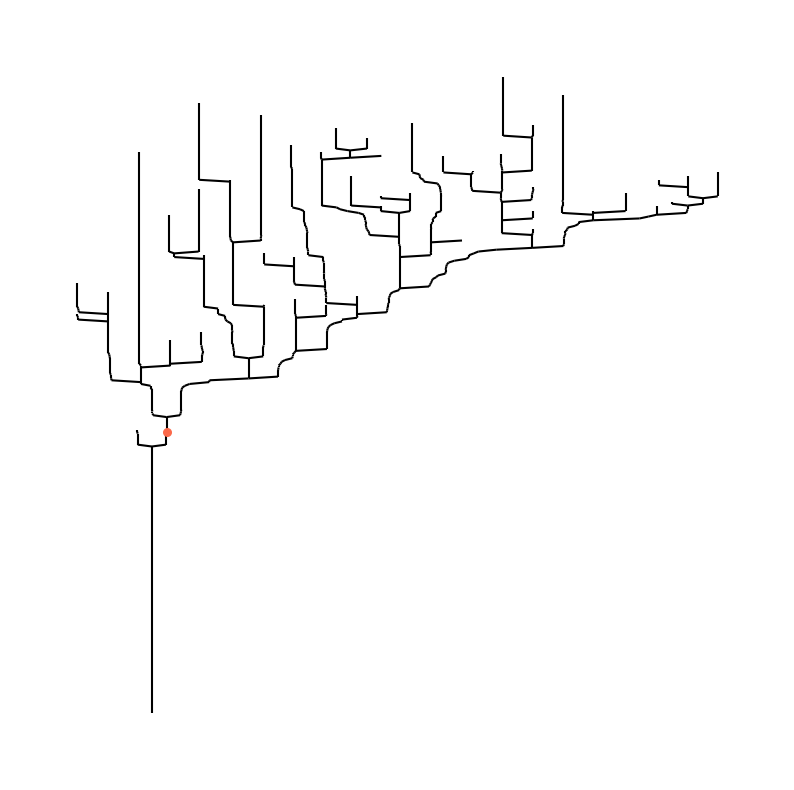

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses
this neuron has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 7s
neuron 7128


<Figure size 640x480 with 0 Axes>

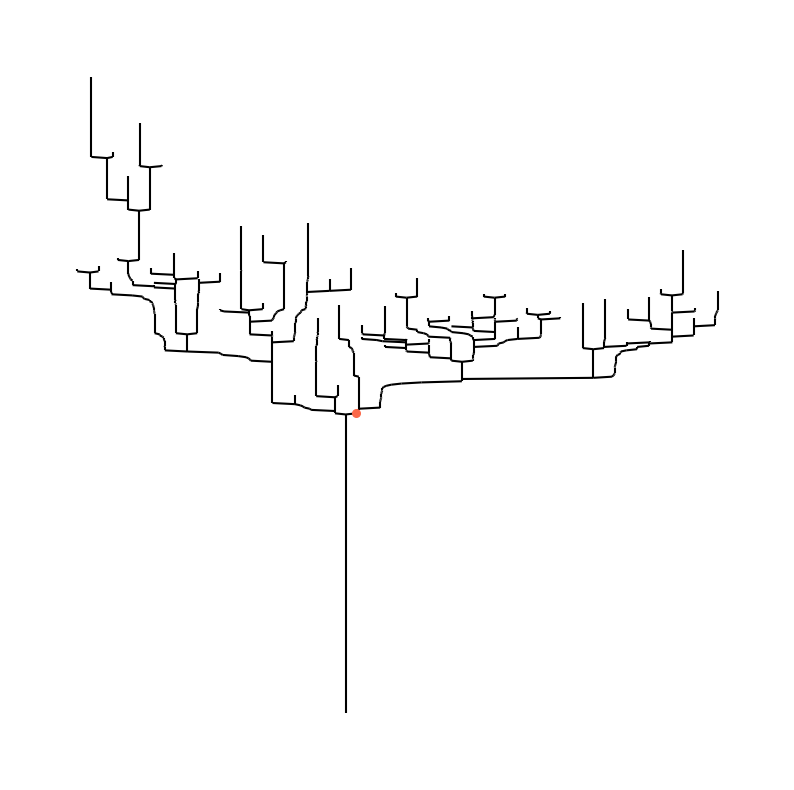

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 0s
neuron 6752


<Figure size 640x480 with 0 Axes>

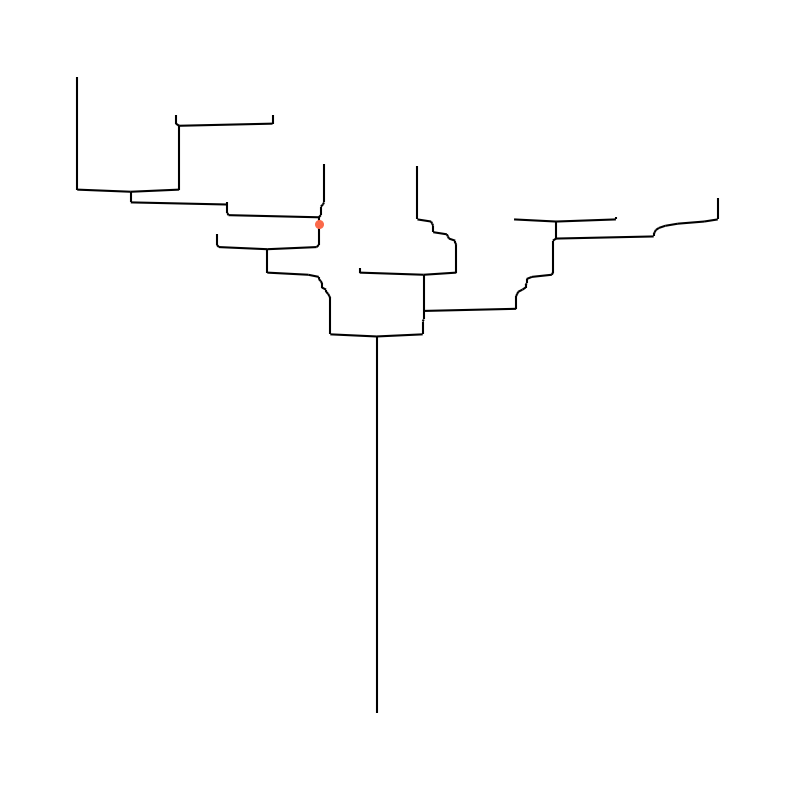

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 6s
neuron 867


<Figure size 640x480 with 0 Axes>

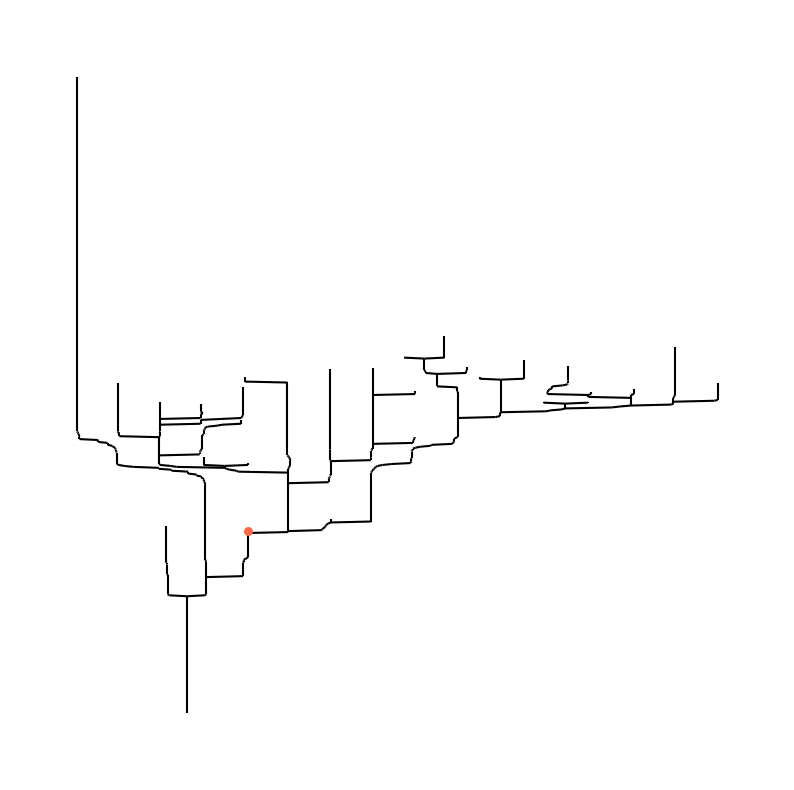

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 3s
neuron 1763


<Figure size 640x480 with 0 Axes>

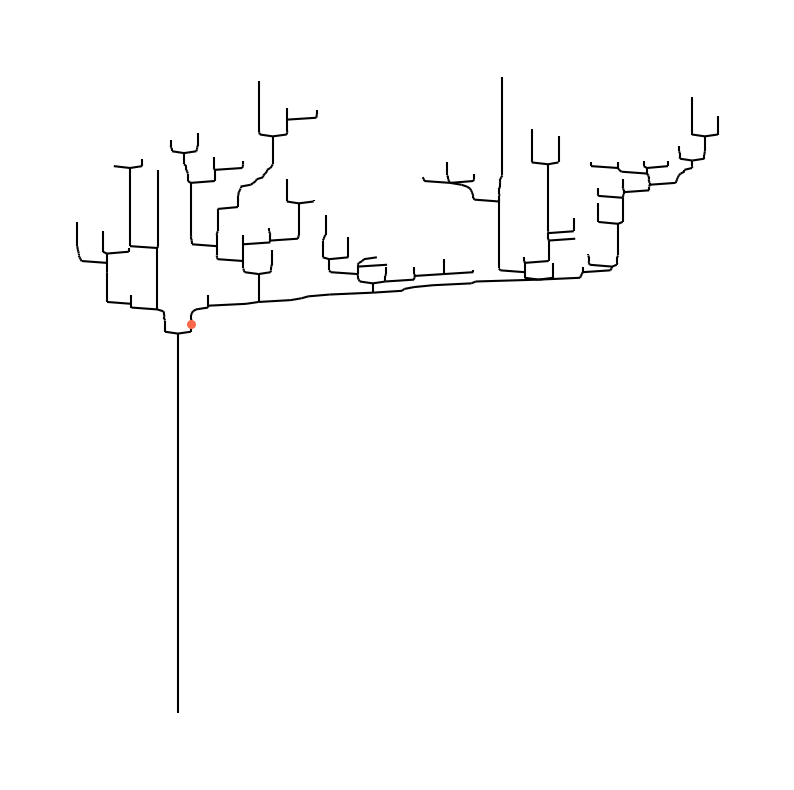

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses
this neuron has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 3s
neuron 878


<Figure size 640x480 with 0 Axes>

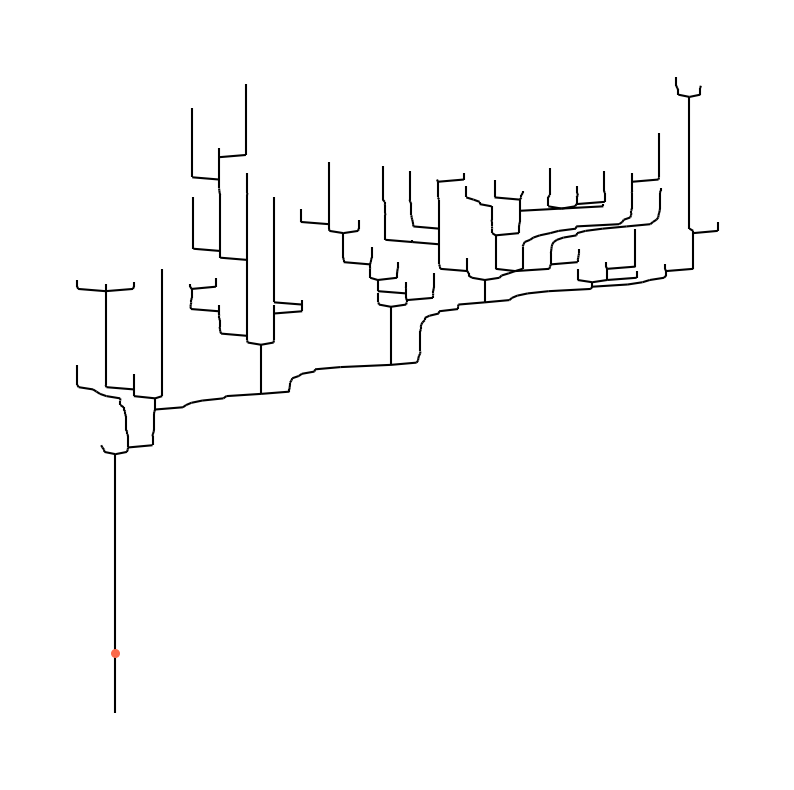

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Data for 1 of 1 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 5s
neuron 8430


<Figure size 640x480 with 0 Axes>

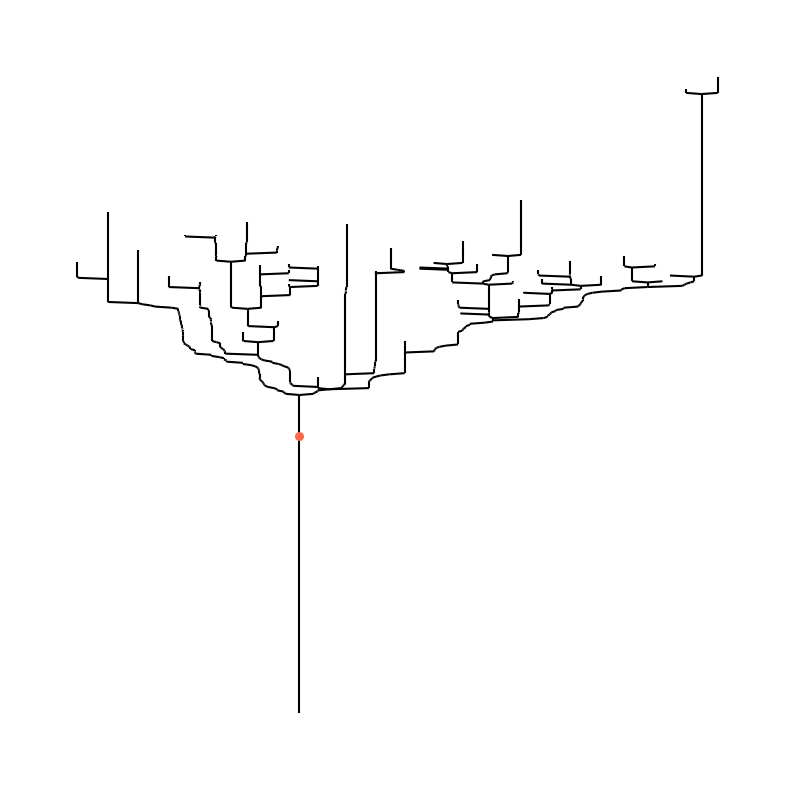

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/2 [00:00<?, ?it/s]

INFO  : Data for 2 of 2 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 11s
neuron 882


<Figure size 640x480 with 0 Axes>

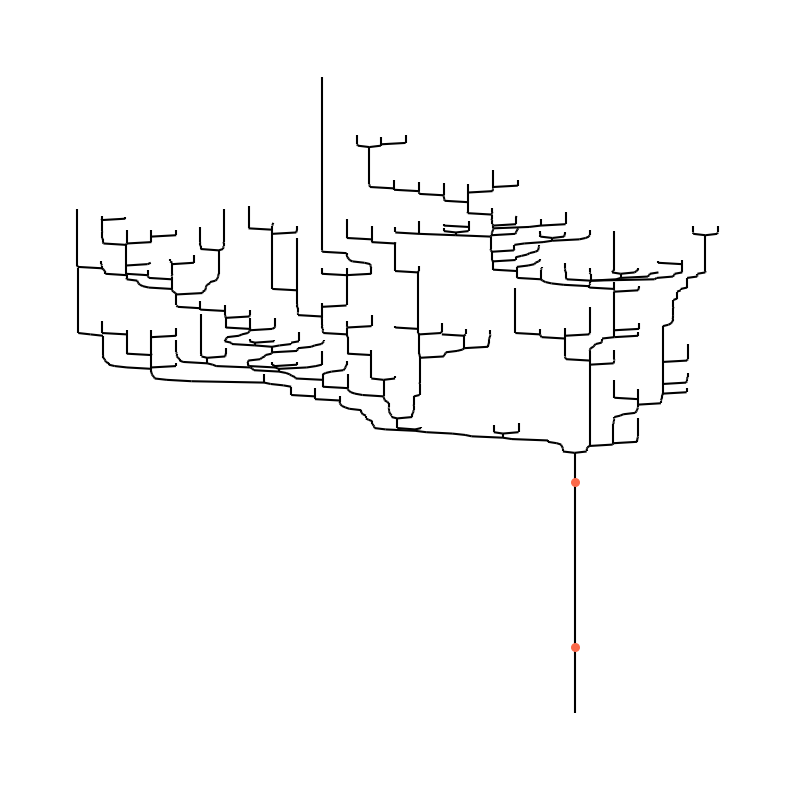

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses
this neuron has no ribbon synapses


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


this neuron has no ribbon synapses


In [16]:
#iterate through all the MD1 OSNs
for n in MD1OSNs:
    #get connector IDs for ribbons
    n=pymaid.get_neuron(n)
    ribbonconnectors=pymaid.get_connectors(n, tags='ribbon synapse', relation_type="presynaptic_to")
    
    #weed out neurons with zero ribbon synapses
    if len(ribbonconnectors)==0:
	    print('this neuron has no ribbon synapses')

    else:
        #get connector details
        ribbon_details=pymaid.get_connector_details(ribbonconnectors)

        #color dictionary
        color=sns.color_palette('Reds', 1)*4
        id_to_color= dict(zip(ribbon_details.presynaptic_to, color))
        connector_id_to_neuron = dict(zip(ribbon_details.connector_id, ribbon_details.presynaptic_to))
        connector_id_to_color = {i : id_to_color[connector_id_to_neuron[i]] for i in ribbon_details.connector_id} 
        #plot the dendrogram
        plt.clf()
        fig, ax= plt.subplots(figsize = (10,10))
        nbd.plot_dendrogram(n, fragment='true', prog='dot', linewidth=1.5, highlight_connectors = connector_id_to_color, highlight_connector_size=30)
        print(n.name)
        name=str(n.id)
        plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_ribbon_%s.svg' % name, format="svg")
        plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_ribbon_%s.png' % name, format="png")
        plt.show()
